# Credit Card Fraud Detection

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDRegressor
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

In [18]:
df = pd.read_csv('fraudTrain.csv', index_col=0)
d_test = pd.read_csv('fraudTest.csv', index_col=0)

In [19]:
df.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [20]:
# By looking on the data set, i think the name are not important and trans_num and unix_time are unique values
df = df.drop(columns=['first', 'last','trans_num','unix_time'])
d_test = d_test.drop(columns=['first', 'last','trans_num','unix_time'])

In [21]:
df.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0


In [22]:
df['age'] = (pd.to_datetime(df['trans_date_trans_time']) - pd.to_datetime(df['dob'])).dt.days // 365
d_test['age'] = (pd.to_datetime(d_test['trans_date_trans_time']) - pd.to_datetime(d_test['dob'])).dt.days // 365

In [23]:
df = df.drop(columns=['trans_date_trans_time', 'dob'])
d_test = d_test.drop(columns=['trans_date_trans_time', 'dob'])

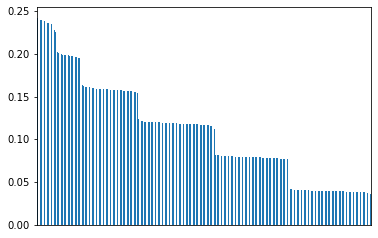

In [24]:
non_fraud_count = df['cc_num'][df['is_fraud'] == 0].value_counts()

# Calculate the percentage of each unique cc_num value
percentage = (non_fraud_count / non_fraud_count.sum()) * 100
percentage.plot(kind='bar')
plt.xticks([])
plt.show()

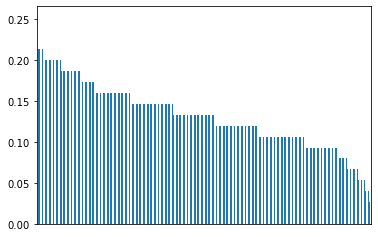

In [25]:
fraud_count = df['cc_num'][df['is_fraud'] == 1].value_counts()

# Calculate the percentage of each unique cc_num value
percentage = (fraud_count / fraud_count.sum()) * 100
percentage.plot(kind='bar')
plt.xticks([])
plt.show()

As shown above the cc_num has the same distribution when transaction is fraud or not the different only is the count and this because the number of fraud transactions is small and also the number of unique value is large so we can drop it

In [26]:
# df = df.drop(columns=['cc_num'])
# d_test = d_test.drop(columns=['cc_num'])

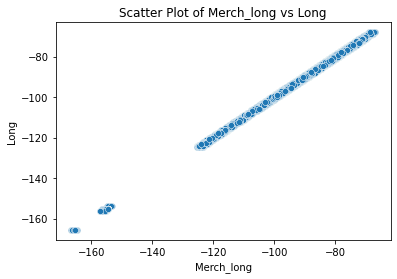

In [27]:
# Create a scatter plot
sns.scatterplot(x='merch_long', y='long', data=df)

# Add labels and title
plt.xlabel('Merch_long')
plt.ylabel('Long')
plt.title('Scatter Plot of Merch_long vs Long')

# Show the plot
plt.show()

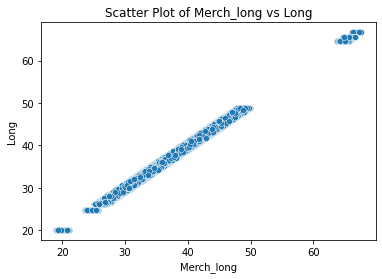

In [28]:
# Create a scatter plot
sns.scatterplot(x='merch_lat', y='lat', data=df)

# Add labels and title
plt.xlabel('Merch_long')
plt.ylabel('Long')
plt.title('Scatter Plot of Merch_long vs Long')

# Show the plot
plt.show()

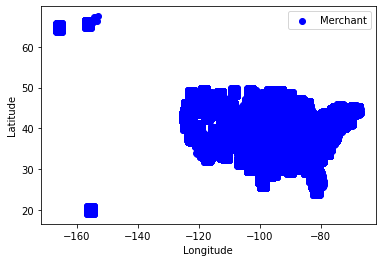

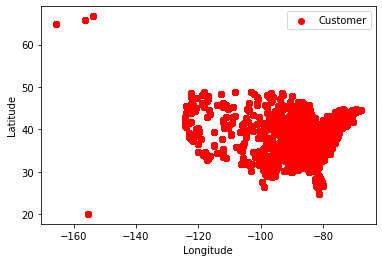

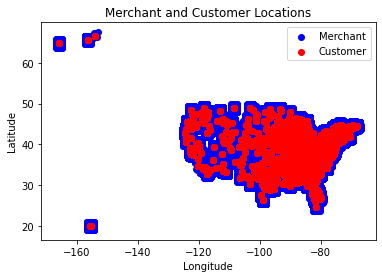

In [29]:
# Assuming df is your DataFrame with 'merch_long', 'merch_lat', 'long', and 'lat' columns

# Create a scatter plot for merchant locations
plt.scatter(df['merch_long'], df['merch_lat'], color='blue', label='Merchant')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Create a scatter plot for customer locations
plt.scatter(df['long'], df['lat'], color='red', label='Customer')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

plt.scatter(df['merch_long'], df['merch_lat'], color='blue', label='Merchant')
plt.scatter(df['long'], df['lat'], color='red', label='Customer')
# Add labels and title
plt.title('Merchant and Customer Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# Add legend
plt.legend()
# Show the plot
plt.show()

As shown in the above figures the merch_long and merch_lat are almost the same as long and lat of the customer this also will be shown in the correlation matrix but if the merch_long and merch_lat identify the merchant location we can drop the merchant columns as the merchant will not change the location and also can drop the street, city and state as we keep the merch_long and merch_lat to store the location

In [30]:
df = df.drop(columns=['street','city','state','merchant'])
d_test = d_test.drop(columns=['street','city','state','merchant'])

In [31]:
print("Shape of the DataFrame:", df.shape)
print("Shape of the DataFrame:", d_test.shape)

Shape of the DataFrame: (1296675, 13)
Shape of the DataFrame: (555719, 13)


In [32]:
# Handle missing values (if any)
df.dropna(inplace=True)
d_test.dropna(inplace=True)

In [33]:
# Remove duplicates (if any)
df.drop_duplicates(inplace=True)
d_test.drop_duplicates(inplace=True)

In [34]:
print("Shape of the DataFrame:", df.shape)
print("Shape of the Test DataFrame:", d_test.shape)
df_length = df.shape[0]

Shape of the DataFrame: (1296675, 13)
Shape of the Test DataFrame: (555719, 13)


In [35]:
print(df.describe())

             cc_num           amt           zip           lat          long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01 -9.022634e+01   
std    1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00  1.375908e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01 -9.679800e+01   
50%    3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01 -6.795030e+01   

           city_pop     merch_lat    merch_long      is_fraud           age  
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  
mean   8.882444e+04  3.853734e+01 -9.022646e+01  5.788652e-03  4.552822e+01  
std    3.019564e+05  5.109788e+00  1.377109e+01  7.586

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 13 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   cc_num      1296675 non-null  int64  
 1   category    1296675 non-null  object 
 2   amt         1296675 non-null  float64
 3   gender      1296675 non-null  object 
 4   zip         1296675 non-null  int64  
 5   lat         1296675 non-null  float64
 6   long        1296675 non-null  float64
 7   city_pop    1296675 non-null  int64  
 8   job         1296675 non-null  object 
 9   merch_lat   1296675 non-null  float64
 10  merch_long  1296675 non-null  float64
 11  is_fraud    1296675 non-null  int64  
 12  age         1296675 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 138.5+ MB


In [37]:
fraud_count = df['is_fraud'].sum()
print("Number of fraudulent transactions:", fraud_count)
print("Number of not fraudulent transactions:", df_length - fraud_count)
print("Ratio of fraudulent transactions:", (fraud_count/df_length) * 100 , "%")

Number of fraudulent transactions: 7506
Number of not fraudulent transactions: 1289169
Ratio of fraudulent transactions: 0.5788651743883394 %


This shown that the data is not balanced the number of fraud transaction >> the number of Non fraud transaction

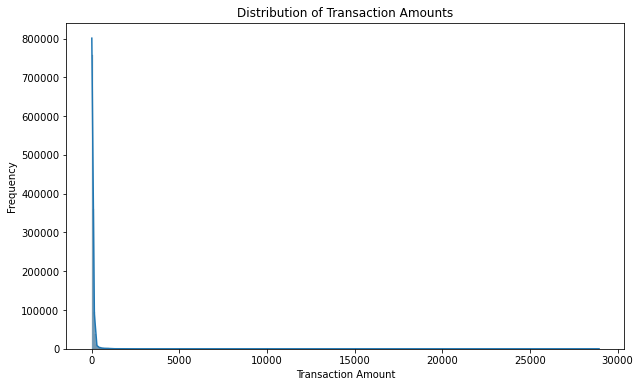

In [38]:
# Example: Histogram of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['amt'], bins=500, kde=True)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')
plt.show()

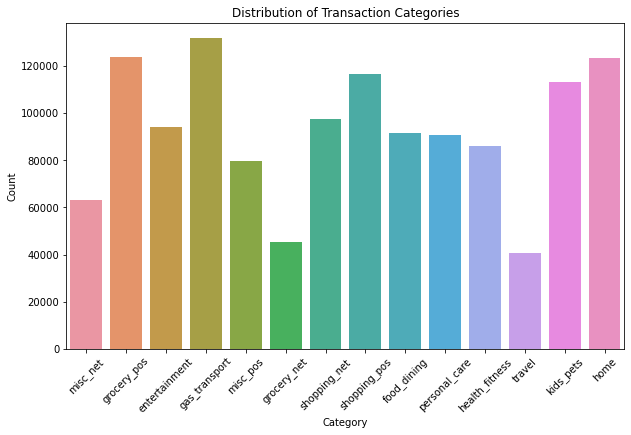

In [39]:
# Example: Bar plot of transaction categories
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Transaction Categories')
plt.xticks(rotation=45)
plt.show()

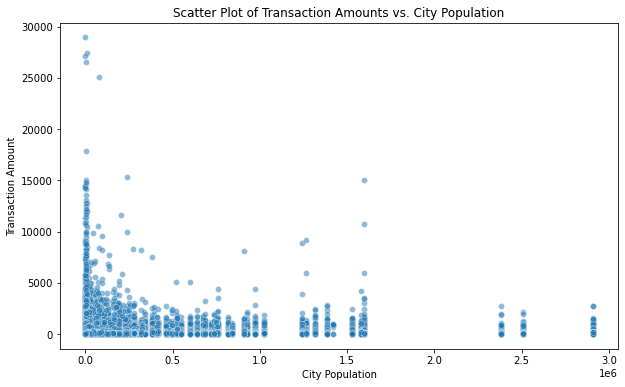

In [40]:
# Example: Scatter plot of transaction amounts vs. city population
plt.figure(figsize=(10, 6))
sns.scatterplot(x='city_pop', y='amt', data=df, alpha=0.5)
plt.xlabel('City Population')
plt.ylabel('Transaction Amount')
plt.title('Scatter Plot of Transaction Amounts vs. City Population')
plt.show()

# Note that on the below graph we see some outliers that want to be removed

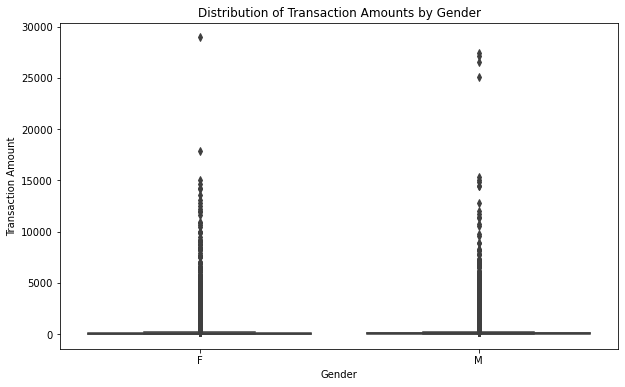

In [41]:
# Example: Box plot of transaction amounts by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='amt', data=df)
plt.xlabel('Gender')
plt.ylabel('Transaction Amount')
plt.title('Distribution of Transaction Amounts by Gender')
plt.show()


# Note that on the below graph we see some outliers that want to be removed

In [42]:
df = df[df['amt'] <= 15000]

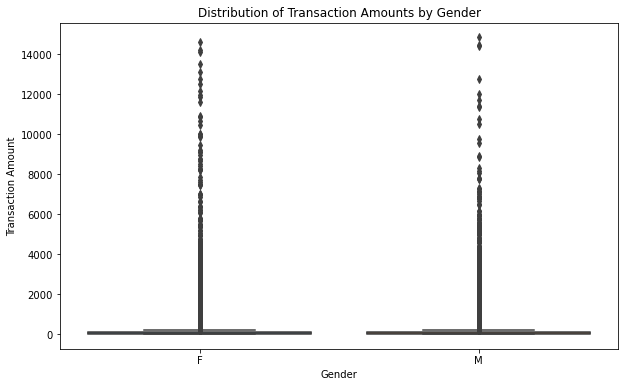

In [43]:
# Example: Box plot of transaction amounts by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='amt', data=df)
plt.xlabel('Gender')
plt.ylabel('Transaction Amount')
plt.title('Distribution of Transaction Amounts by Gender')
plt.show()

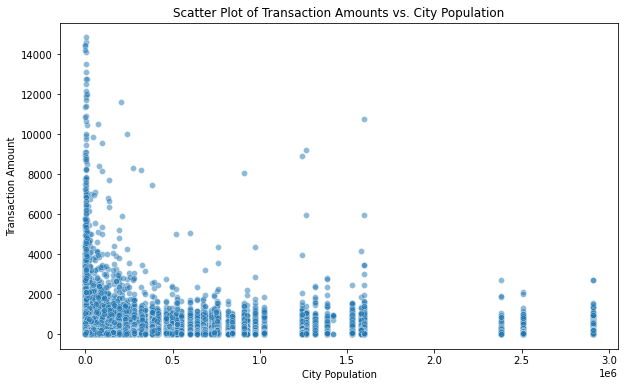

In [44]:
# Example: Scatter plot of transaction amounts vs. city population
plt.figure(figsize=(10, 6))
sns.scatterplot(x='city_pop', y='amt', data=df, alpha=0.5)
plt.xlabel('City Population')
plt.ylabel('Transaction Amount')
plt.title('Scatter Plot of Transaction Amounts vs. City Population')
plt.show()

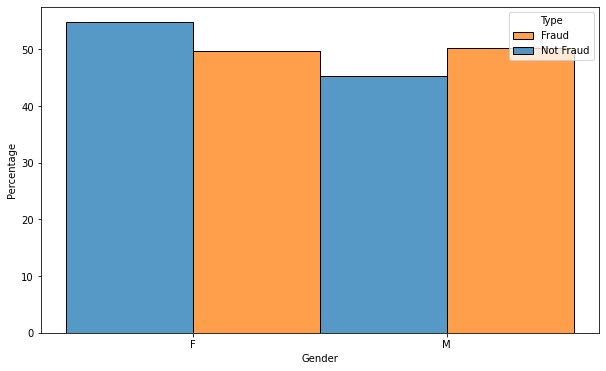

In [45]:
plt.figure(figsize=(10, 6))
ax=sns.histplot(x='gender',data=df, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Gender')
plt.legend(title='Type', labels=['Fraud','Not Fraud'])

There are almost the same we can't say the certian gender has fraud or non fraud transactions more than the other

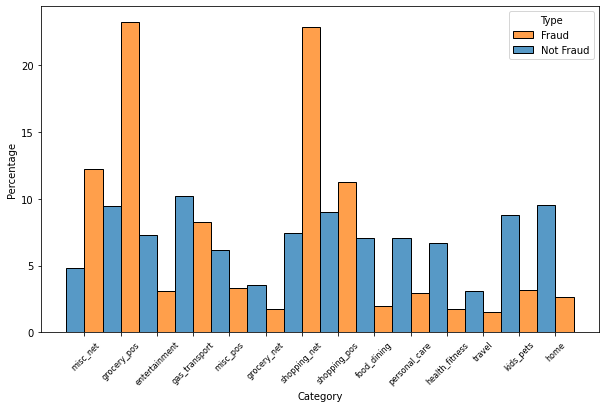

In [46]:
plt.figure(figsize=(10, 6))
ax=sns.histplot(x='category',data=df, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Category')
plt.legend(title='Type', labels=['Fraud','Not Fraud'])
plt.xticks(rotation=45, fontsize=8)
plt.show()

Shopping_net and Grocery_pos has high percentage of fraud transactions

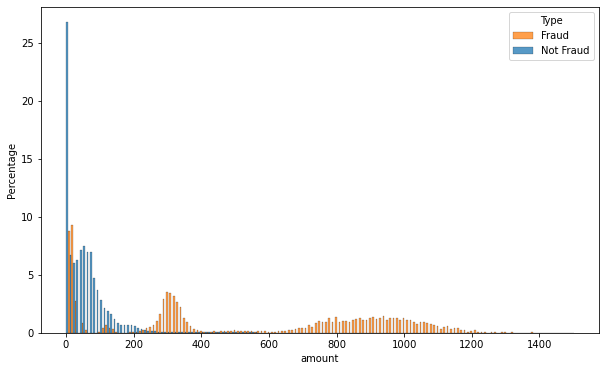

In [47]:
plt.figure(figsize=(10, 6))
ax=sns.histplot(x='amt',data=df[df['amt']<1500], hue='is_fraud',stat='percent',multiple='dodge',common_norm=False, binwidth=10)
ax.set_ylabel('Percentage')
ax.set_xlabel('amount')
plt.legend(title='Type', labels=['Fraud','Not Fraud'])
plt.show()

When the amout of tansaction increase the probability that this transactions is being fraud is also increase. The small transactions is not fraud

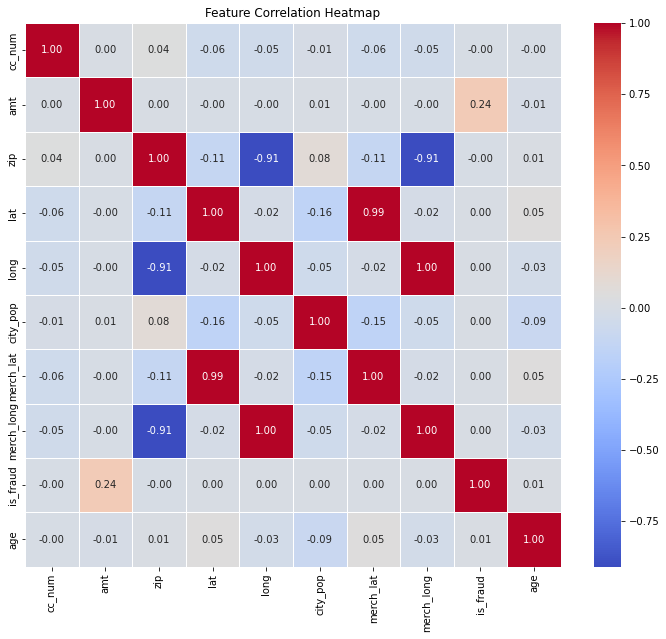

In [48]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [49]:
# I think we can remove lat or merch_lat because they are highly correlated so they can cause multicollinearity 
# decide after the model is done
df = df.drop(columns=['long','lat','zip'])
d_test = d_test.drop(columns=['long','lat','zip'])

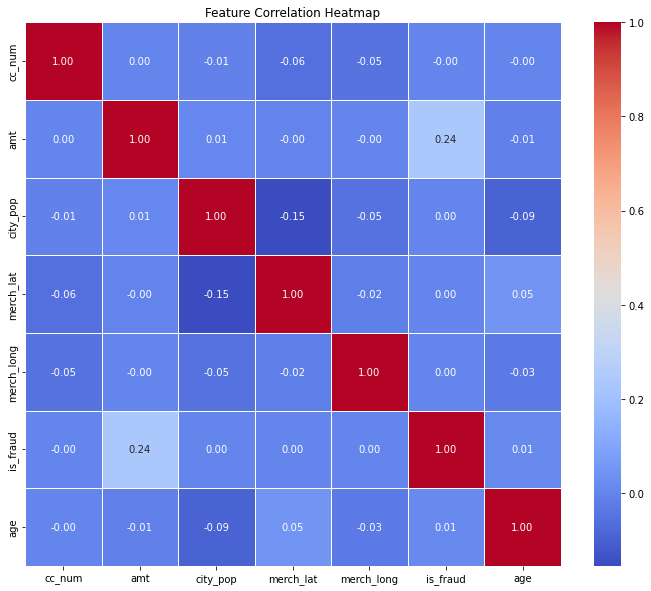

In [50]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [51]:
df.head(3)

,cc_num,category,amt,gender,city_pop,job,merch_lat,merch_long,is_fraud,age
0,2703186189652095,misc_net,4.97,F,3495,"Psychologist, counselling",36.011293,-82.048315,0,30
1,630423337322,grocery_pos,107.23,F,149,Special educational needs teacher,49.159047,-118.186462,0,40
2,38859492057661,entertainment,220.11,M,4154,Nature conservation officer,43.150704,-112.154481,0,56


In [52]:
# Columns to be label encoded
columns_to_encode = ['category', 'gender', 'job']

# Apply label encoding
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    df[column + '_encoded'] = label_encoders[column].fit_transform(df[column])
df = df.drop(columns=columns_to_encode)    

# Apply label encoding
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    d_test[column + '_encoded'] = label_encoders[column].fit_transform(d_test[column])
d_test = d_test.drop(columns=columns_to_encode)    

In [53]:
df.head(3)

,cc_num,amt,city_pop,merch_lat,merch_long,is_fraud,age,category_encoded,gender_encoded,job_encoded
0,2703186189652095,4.97,3495,36.011293,-82.048315,0,30,8,0,370
1,630423337322,107.23,149,49.159047,-118.186462,0,40,4,0,428
2,38859492057661,220.11,4154,43.150704,-112.154481,0,56,0,1,307


In [54]:
d_test.head(3)

,cc_num,amt,city_pop,merch_lat,merch_long,is_fraud,age,category_encoded,gender_encoded,job_encoded
0,2291163933867244,2.86,333497,33.986391,-81.200714,0,52,10,1,275
1,3573030041201292,29.84,302,39.450498,-109.960431,0,30,10,0,392
2,3598215285024754,41.28,34496,40.495810,-74.196111,0,49,5,0,259


In [55]:
X_train = df.drop('is_fraud',axis=1)
y_train = df['is_fraud']

X_test = d_test.drop('is_fraud',axis=1)
y_test = d_test['is_fraud']

In [56]:
print(X_train)

                      cc_num     amt  city_pop  merch_lat  merch_long  age  \
0           2703186189652095    4.97      3495  36.011293  -82.048315   30   
1               630423337322  107.23       149  49.159047 -118.186462   40   
2             38859492057661  220.11      4154  43.150704 -112.154481   56   
3           3534093764340240   45.00      1939  47.034331 -112.561071   52   
4            375534208663984   41.96        99  38.674999  -78.632459   32   
...                      ...     ...       ...        ...         ...  ...   
1296670       30263540414123   15.56       258  36.841266 -111.690765   58   
1296671     6011149206456997   51.70       100  38.906881  -78.246528   40   
1296672     3514865930894695  105.93       899  33.619513 -105.130529   52   
1296673     2720012583106919   74.90      1126  42.788940 -103.241160   39   
1296674  4292902571056973207    4.30       218  46.565983 -114.186110   24   

         category_encoded  gender_encoded  job_encoded  
0     

In [57]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [58]:
# Also, lets standardize the data since it improves the training process
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
X_train = (X_train - X_mean)/(1e-8 + X_std)
X_test = (X_test - X_mean)/(1e-8 + X_std)

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


classifier = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Support Vector Classifier": SVC(),
    "K-Nearest Neighbors Classifier": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "AdaBoost Classifier": AdaBoostClassifier(),
}

for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"\n Accuracy: {accuracy}")
    print(f" Precision: {precision}")
    print(f" Recall: {recall}")
    print(f" F1 Score: {f1}")
    
    # Confusion Matrix
    print("\n Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    # # Classification Report
    # print("\n Classification Report:")
    # print(classification_report(y_test, y_pred))


==========Logistic Regression===========

 Accuracy: 0.9954473393927507
 Precision: 0.0
 Recall: 0.0
 F1 Score: 0.0

 Confusion Matrix:
[[553189    385]
 [  2145      0]]

==========Random Forest Classifier===========


# Under Sampling

In [31]:
normal = df[df['is_fraud']==0]
fraud = df[df['is_fraud']==1]

In [32]:
normal.shape

(1289160, 14)

In [33]:
fraud.shape

(7506, 14)

In [34]:
normal_sample = normal.sample(n=fraud.shape[0])

In [35]:
normal_sample.shape

(7506, 14)

In [36]:
new_data = pd.concat([normal_sample,fraud], ignore_index=True)

In [37]:
new_data.head(3)

,cc_num,amt,city_pop,merch_lat,merch_long,is_fraud,merchant_encoded,category_encoded,gender_encoded,street_encoded,city_encoded,state_encoded,job_encoded,dob_encoded
0,4069975342931683,204.40,21902,39.272708,-81.384964,0,602,4,0,189,370,49,436,641
1,4003771737807706,8.93,37,36.000775,-91.030018,0,256,11,0,30,310,2,265,239
2,6011679934075347,6.00,100,40.974557,-107.072948,0,247,9,0,553,387,50,377,538


In [38]:
new_data['is_fraud'].value_counts()

0    7506
1    7506
Name: is_fraud, dtype: int64

In [68]:
X = new_data.drop('is_fraud', axis = 1)
y= new_data['is_fraud']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [70]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [71]:
print(X_train)

[[4.87401721e+15 5.03100000e+01 4.28170000e+04 ... 3.70000000e+01
  3.42000000e+02 6.67000000e+02]
 [6.01165292e+15 9.48340000e+02 1.84700000e+03 ... 2.40000000e+01
  4.47000000e+02 7.91000000e+02]
 [4.15894509e+15 5.67400000e+01 6.87276000e+05 ... 3.80000000e+01
  4.11000000e+02 5.30000000e+02]
 ...
 [4.16975966e+15 2.23100000e+01 2.13000000e+02 ... 3.80000000e+01
  4.28000000e+02 4.93000000e+02]
 [1.80094419e+14 3.77990000e+02 5.42870000e+04 ... 4.00000000e+00
  1.22000000e+02 5.09000000e+02]
 [4.68914727e+18 1.38700000e+01 2.06000000e+02 ... 2.90000000e+01
  2.34000000e+02 4.16000000e+02]]



==========Logistic Regression===========

 Accuracy: 0.499928247851314

 Precision: 0.0


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 Recall: 0.0

 F1 Score: 0.0


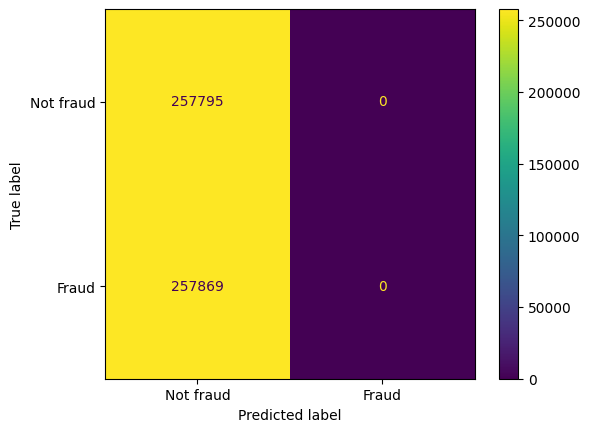


==========Decision Tree Classifier===========

 Accuracy: 0.9816101182165131

 Precision: 0.9753762650620856

 Recall: 0.9881722890304767

 F1 Score: 0.9817325825770871


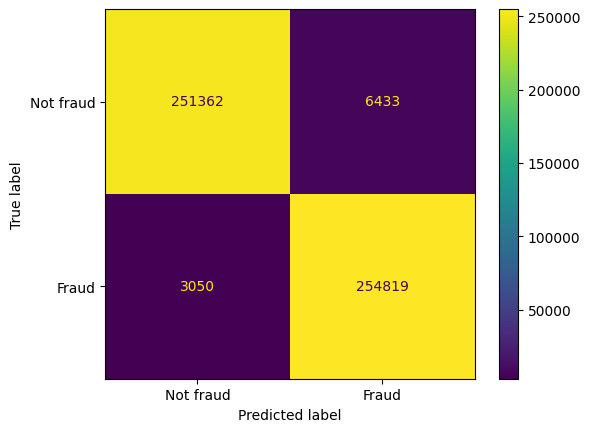


==========AdaBoost Classifier===========

 Accuracy: 0.8917376431164479

 Precision: 0.9351727405875765

 Recall: 0.841865443306485

 F1 Score: 0.8860694395409064


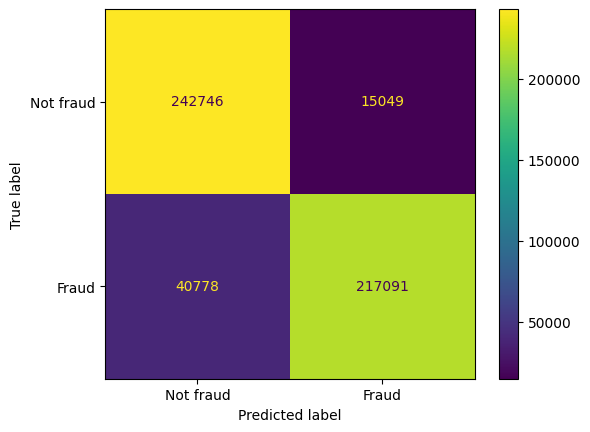


==========Random Forest Classifier===========

 Accuracy: 0.9947368829315213

 Precision: 0.9915428923693387

 Recall: 0.9979873501661697

 F1 Score: 0.9947546838701697


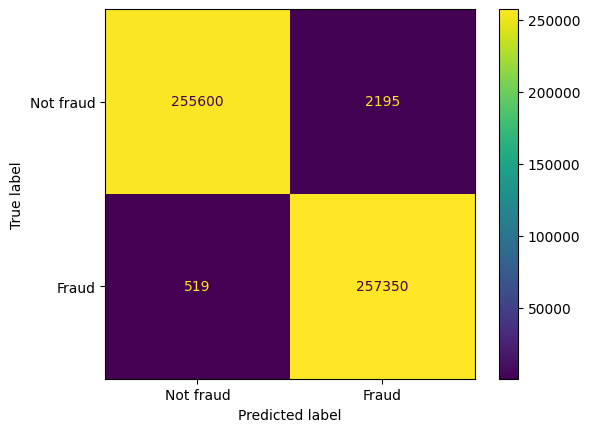

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


classifier = {
    "Logistic Regression": LogisticRegression(solver='liblinear'),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Random Forest Classifier": RandomForestClassifier()
}

for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuaracy: {accuracy_score(y_test, y_pred)}")
    print(f"\n Precision: {precision_score(y_test, y_pred , zero_division=1)}")
    print(f"\n Recall: {recall_score(y_test, y_pred, zero_division= 1)}")
    print(f"\n F1 Score: {f1_score(y_test, y_pred , zero_division= 1)}")
    cm = confusion_matrix(y_test, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not fraud", "Fraud"])
    display.plot()
    plt.show()


# Over Sampling

In [86]:
X = df.drop('is_fraud', axis = 1)
y= df['is_fraud']


In [87]:
X.shape

(1296666, 13)

In [88]:
y.shape

(1296666,)

In [89]:
from imblearn.over_sampling import SMOTE

In [90]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [91]:
y_res.value_counts()

0    1289160
1    1289160
Name: is_fraud, dtype: int64

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)


==========Logistic Regression===========

 Accuaracy: 0.499928247851314

 Precision: 1.0

 Recall: 0.0

 F1 Score: 0.0


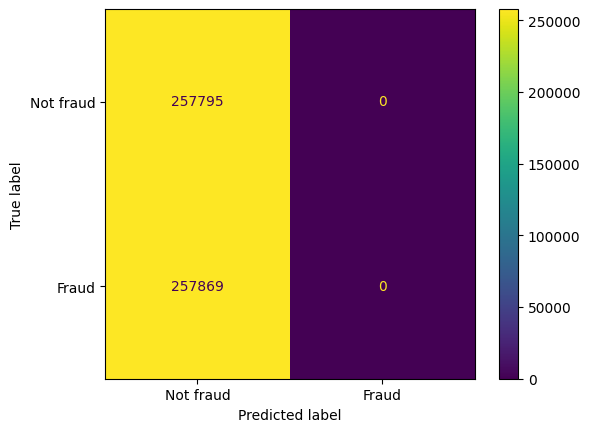


==========Decision Tree Classifier===========

 Accuaracy: 0.9818913090694716

 Precision: 0.9757794343429702

 Recall: 0.9883196506753429

 F1 Score: 0.9820095096445057


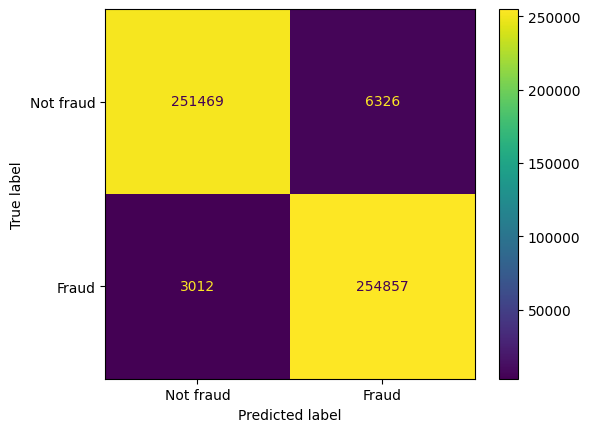


==========AdaBoost Classifier===========

 Accuaracy: 0.8919994414967886

 Precision: 0.9298583559768164

 Recall: 0.8479964633205233

 F1 Score: 0.8870427311595906


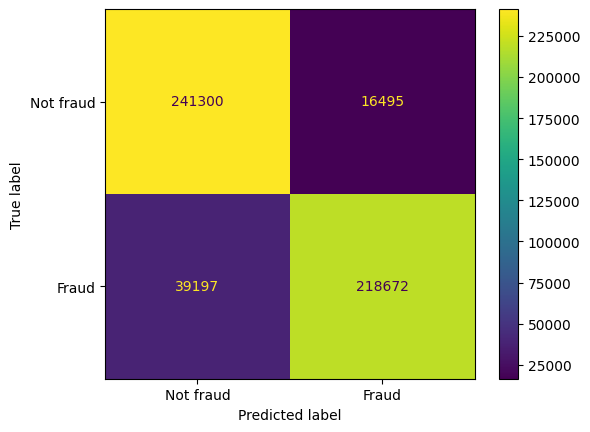


==========Random Forest Classifier===========

 Accuaracy: 0.9947776071240187

 Precision: 0.9915663021953043

 Recall: 0.9980455192365115

 F1 Score: 0.9947953608556249


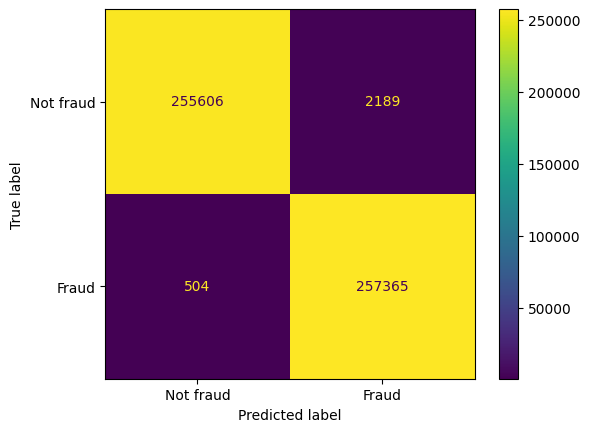

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


classifier = {
    "Logistic Regression": LogisticRegression(solver='liblinear'),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Random Forest Classifier": RandomForestClassifier()
}

for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuaracy: {accuracy_score(y_test, y_pred)}")
    print(f"\n Precision: {precision_score(y_test, y_pred , zero_division=1)}")
    print(f"\n Recall: {recall_score(y_test, y_pred, zero_division= 1)}")
    print(f"\n F1 Score: {f1_score(y_test, y_pred , zero_division= 1)}")
    cm = confusion_matrix(y_test, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not fraud", "Fraud"])
    display.plot()
    plt.show()
